In [1]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

# 正規分布の極限としてのデルタ関数


## $\int_{-\infty}^{\infty} f_\sigma(x) dx = 1$が成り立つこと

In [2]:
x = sym.symbols('x')
f = lambda s: 1/sym.sqrt(2*sym.pi*s)* sym.exp((-x**2)/(2*s))

for sigma in [5e-1, 1e-1, 1e-2, 1e-3]:
    r = sym.integrate(f(sigma), (x, -sym.oo, sym.oo))
    assert(np.isclose(float(r), 1))

## 各$\sigma$におけるグラフの概形

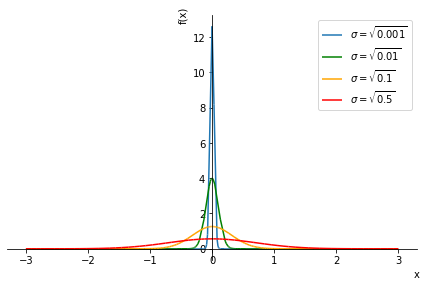

In [3]:
import sympy as sym

x = sym.symbols('x')
f = lambda s: 1/sym.sqrt(2*sym.pi*s)* sym.exp((-x**2)/(2*s))

p1 = sym.plot(f(1e-3), (x, -3, 3), show=False, legend=True, label="$\sigma=\sqrt{0.001}$")
p2 = sym.plot(f(1e-2), (x, -3, 3), show=False, legend=True, label="$\sigma=\sqrt{0.01}$", line_color="green")
p3 = sym.plot(f(1e-1), (x, -3, 3), show=False, label="$\sigma=\sqrt{0.1}$", line_color="orange")
p4 = sym.plot(f(5e-1), (x, -3, 3), show=False, label="$\sigma=\sqrt{0.5}$", line_color="red")

p1.append(p2[0])
p1.append(p3[0])
p1.append(p4[0])
p1.show()

## デルタ関数と$f(x)$の積分が$f(x_0)$の値となること

In [4]:
import sympy as sym

x = sym.symbols('x')
f = x**2

for x0 in range(0, 101):
    r = sym.integrate(sym.DiracDelta(x + x0)*f, (x, -sym.oo, sym.oo))
    assert(r == f.subs(x, x0).doit())

# テスト関数

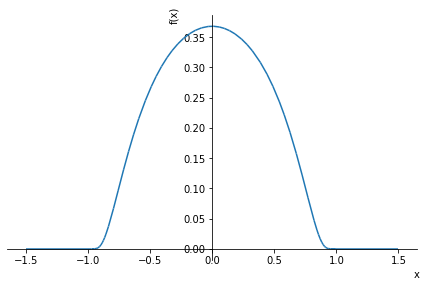

In [5]:
import sympy as sym
from sympy.plotting import plot

x = sym.symbols('x')

f = sym.Piecewise(
    (sym.exp((-1/(1 - x**2))), (sym.Abs(x) < 1)),
    (0, (sym.Abs(x) >= 1)), 
)

plot(f, (x, -1.5, 1.5))

In [6]:
f = lambda x: x**2

f(2), f(1 + 1), f(1) + f(1)

(4, 4, 2)

# ヘビサイド関数

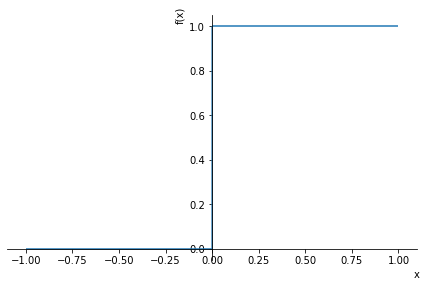

In [7]:
from sympy import Heaviside, DiracDelta, plot
import sympy as sym

x = sym.symbols('x')
plot(Heaviside(x), (x, -1, 1))

## ヘヴィサイド関数の微分

In [8]:
from sympy import Heaviside, DiracDelta

def check_heaviside_derivative(f, x, n):
    if n < 1: n = 1
    
    # ヘヴィサイド関数のn階微分
    h_derivative = Heaviside(x).diff(x, n)
    
    if n == 1:
        # 1階微分のときは、H'とδ(0)が一致すること
        return h_derivative.subs(x, 0) == DiracDelta(x).subs(x, 0)
    else:
        # δのn階微分とfのn階微分の結果が一致すること
        r1 = sym.integrate(f.diff(x, 1) * h_derivative, (x, -sym.oo, sym.oo))
        r2 = (-1**n)*f.diff(x, n).subs(x, 0)
        
        return r1 == r2

x = sym.symbols('x')

f = sym.Piecewise(
    (sym.exp((-1/(1 - x**2))), (sym.Abs(x) < 1)),
    (0, (sym.Abs(x) >= 1)), 
)
    
for n in range(1, 11):
    assert(check_heaviside_derivative(f, x, n))

# リーマンルベーグの補題

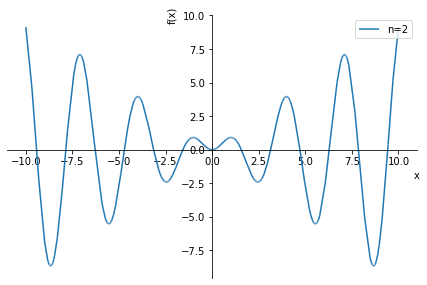

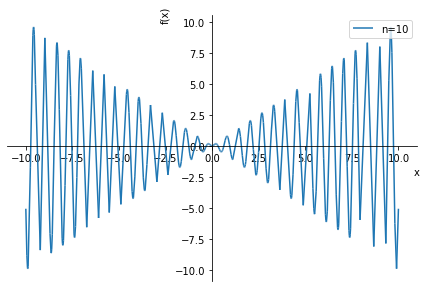

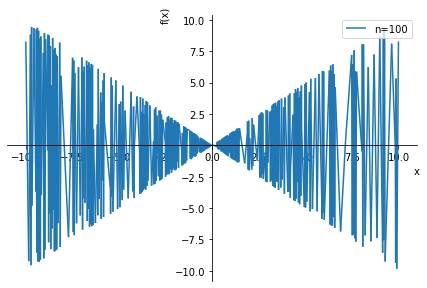

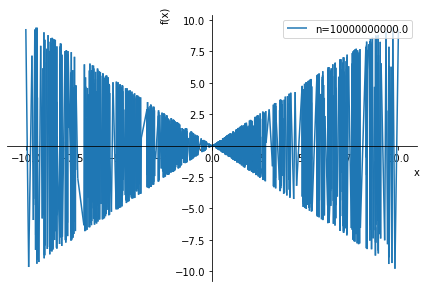

In [9]:
import sympy as sym

x = sym.symbols('x', real=True)
f = lambda n: x*sym.sin(n*x)
for n in [2, 10, 100, 1e+10]:
    sym.plot(f(n), legend=True, label=f"n={n}")

# 急減少関数

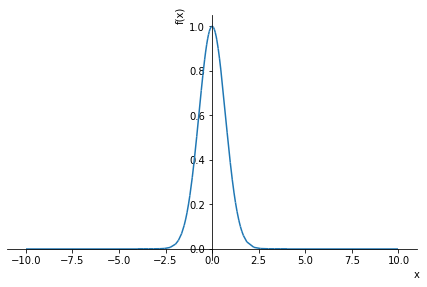

In [10]:
x = sym.symbols('x', real=True)
sym.plot(sym.exp(-x**2))

# フーリエ積分公式の収束の確認

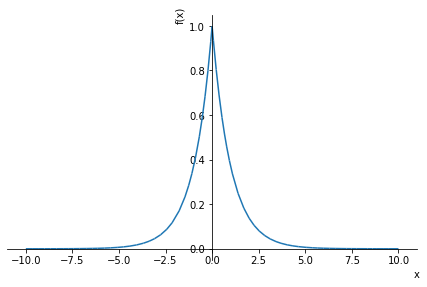

In [11]:
import sympy as sym

x = sym.symbols('x', real=True)
sym.plot(sym.exp(-sym.Abs(x)))

In [12]:
# kはξに相当
k = sym.symbols('k', real=True)
F = lambda L: sym.integrate(sym.cos(k*x)/(1+k**2), (k, 0, L))

In [13]:
from multiprocessing.pool import ThreadPool
import os

def compute_fourier_integral(F, domain, processes = os.cpu_count()):
    def compute(domain):
        return [(2/np.pi)*(F.subs(x, d).evalf()) for d in domain]

    splited_domains = np.split(domain, processes)

    values = []

    with ThreadPool(processes=processes) as p:
        for val in p.map(compute, splited_domains):
            values = values + val
            
    return values

In [14]:
domain=np.arange(-10, 10, 0.05)

values1 = compute_fourier_integral(F(1), domain)
values5 = compute_fourier_integral(F(5), domain)
values10 = compute_fourier_integral(F(10), domain)
values50 = compute_fourier_integral(F(50), domain)

In [15]:
def show_plot(x, y, title):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position(('data', 0))
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.yaxis.set_ticks_position('left')
    
    plt.title(title)
    plt.ylim(-0.1, 1)
    plt.plot(x, y)
    plt.show()

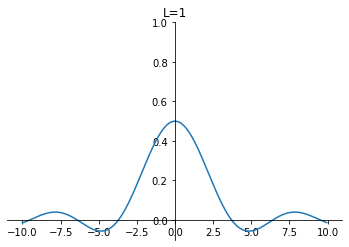

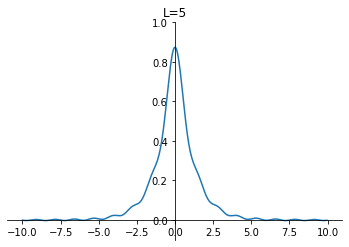

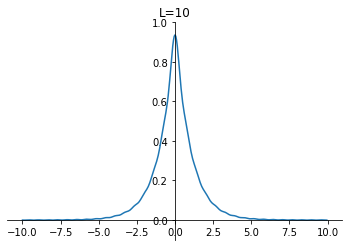

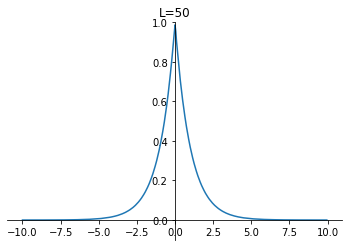

In [16]:
show_plot(domain, values1, "L=1")
show_plot(domain, values5, "L=5")
show_plot(domain, values10, "L=10")
show_plot(domain, values50, "L=50")

# プランシュレルの定理の確認

In [17]:
from npmath.compute import fourier_transform
from npmath.space import L2Space, PiecewiseContinuousFunction as P
import sympy as sym

x, k = sym.symbols('x, k')
I = sym.Interval(-sym.oo, sym.oo)
L2 = L2Space(I)
f = L2.take(sym.exp(-sym.Abs(x)), symbols=[x])

F = fourier_transform(f.value, x, k)
F_norm = L2.norm(P(F, I, k, True), k).evalf()
f_norm = (sym.sqrt(2*sym.pi)*L2.norm(f, x)).evalf()

print("‖F‖:", F_norm)
print("√2π‖f‖:", f_norm)
print("‖F‖ = √2π‖f‖:", F_norm == f_norm)

‖F‖: 2.50662827463100
√2π‖f‖: 2.50662827463100
‖F‖ = √2π‖f‖: True


# デルタ関数のフーリエ変換

In [18]:
from npmath.compute import fourier_transform
import sympy as sym

F = fourier_transform(sym.DiracDelta(x), x, k)
print(F)

1
